# Convolutional Neural Networks

## Preliminaries

In this practical session you will implement and train several Convolutional Neural Networks (CNNs) using the Keras framework with a Tensorflow backend. If you are not already familiar with Keras, you can go over the [following tutorial](https://github.com/tueimage/essential-skills/blob/master/keras.md). More detailed information on the different functionalities can be found in the [Keras library documentation](https://keras.io/). 

Note that for this set of exercise CPU-only Tensorflow, which you should already have installed, is sufficient (i.e. GPU-support is not required but it will make your experiments run faster). 

You are also required to use the `gryds` package for data augmentation that you can install directly from git: `pip install git+https://github.com/tueimage/gryds/`.

You also have to install the Keras deep learning framework (if you have not done so already) by running `conda install keras`. Note that there are two implementations of Keras, one from https://keras.io/ and another one that ships with Tensorflow. Here we use the former. 

## MNIST
We will first train a simple CNN to classify handwritten digits using the MNIST dataset. This dataset is often referred to as the "Hello world!" example of deep learning because it can be used to quickly illustrate a small neural network in action (and obtain a decent classification accuracy in the process). More information on it can be found [here](http://yann.lecun.com/exdb/mnist/).

First, let's load the dataset and visualize some images.

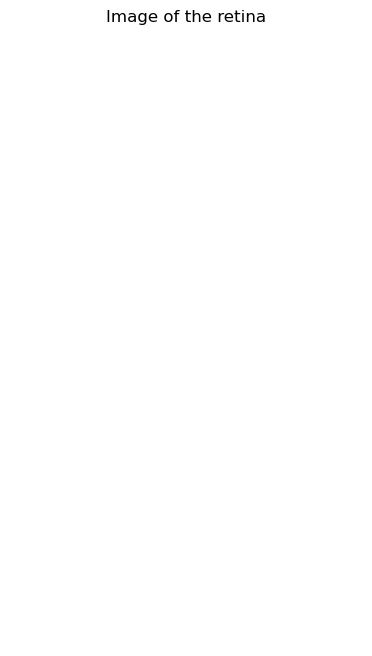

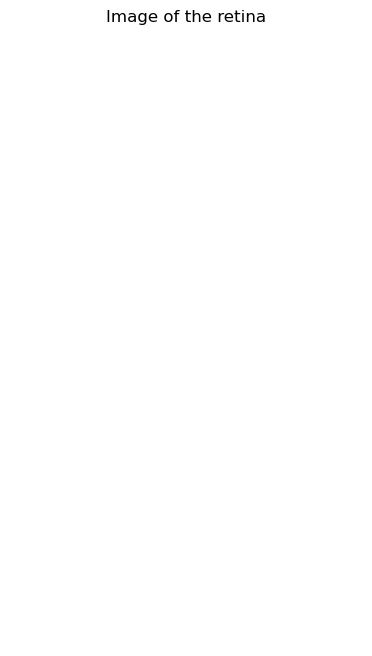

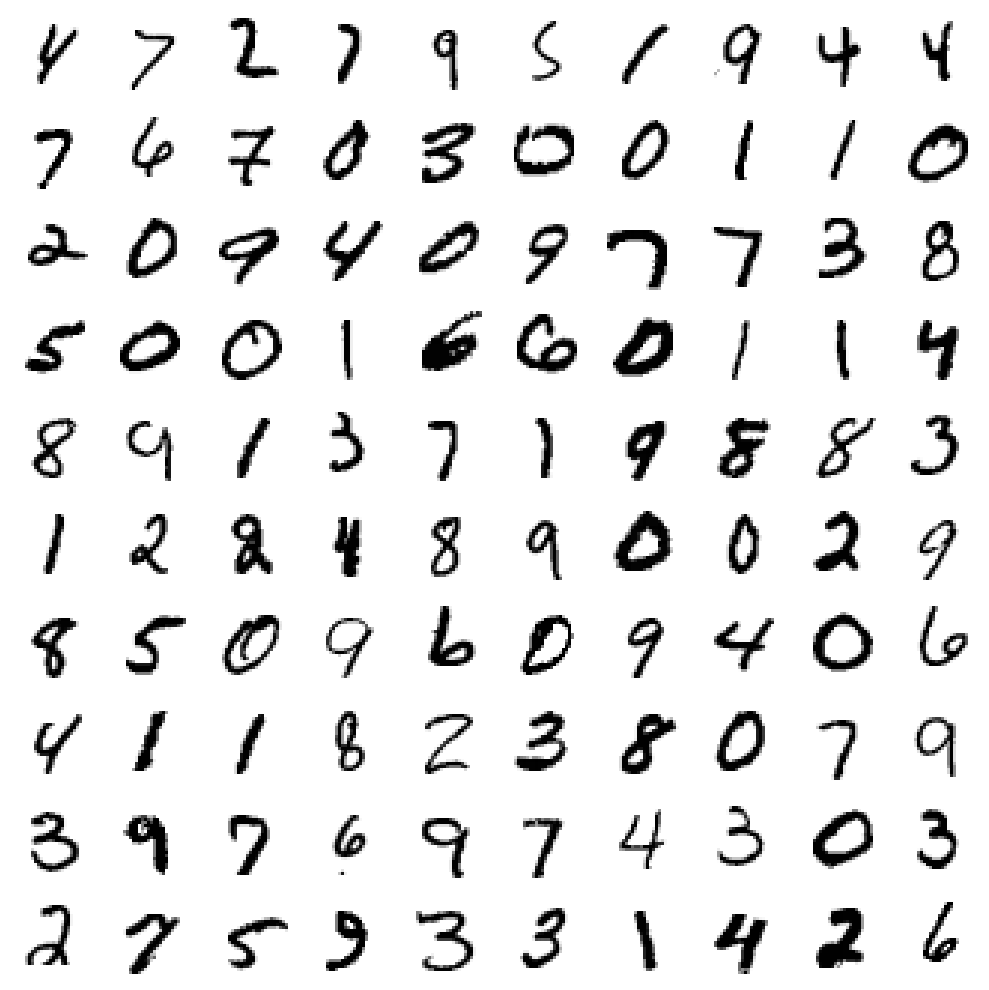

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow
from keras.datasets import mnist
from keras.utils import to_categorical

# load the MNIST the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# scale the image intensities to the 0-1 range
x_train = (x_train / 255.0).astype(np.float32)
x_test = (x_test / 255.0).astype(np.float32)

# convert the data to channel-last
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# convert the labels to one-hot encoded
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

def plot_images(images, dim=(10, 10), figsize=(10, 10), title=''):
    
    plt.figure(figsize=figsize)
    
    for i in range(images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    
    plt.tight_layout()
    plt.suptitle(title)
    plt.show()
    
plot_images(x_train[np.random.randint(0, x_train.shape[0], size=100)].reshape(100, 28, 28))

The MNIST classification task is quite simple: given an image, predict the digit that it contains. Thus, this is a 10-class classification problem.

Let's define a simple network for the handwritten digit classification.

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

Compile and train the network (note that this could take a while).

In [9]:
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=1,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 65ms/step - accuracy: 0.8549 - loss: 0.4620 - val_accuracy: 0.9820 - val_loss: 0.0540
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 69ms/step - accuracy: 0.9734 - loss: 0.0902 - val_accuracy: 0.9883 - val_loss: 0.0374
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 73ms/step - accuracy: 0.9796 - loss: 0.0662 - val_accuracy: 0.9877 - val_loss: 0.0362
Epoch 4/12
  9/469 ━━━━━━━━━━━━━━━━━━━━ 32s 72ms/step - accuracy: 0.9829 - loss: 0.0477

Now that the model is trained, we can evaluate its performance on the independent test dataset.

In [4]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04921453446149826
Test accuracy: 0.9836999773979187


## U-Net
The U-Net convolutional neural network architecture was first developed for biomedical image segmentation and is to this day one of the most widely used methods for image segmentation. The details of the architecture can be found in the [original paper](https://arxiv.org/abs/1505.04597). In this practical we will build and train a U-Net network that is able to segment blood vessels in retinal images. 

### Loading and visualizing the data
The data for this task is taken from the [DRIVE](https://www.isi.uu.nl/Research/Databases/DRIVE/index.php) database. It consists of photographs of the retina, where the goal is to segment the blood vessels within. The dataset has a total of 40 photographs, divided in 20 images for training and 20 for testing. The images corresponding to the DRIVE test set can be found [here](https://www.dropbox.com/s/zk51wgupimw7jd9/DRIVE.zip?dl=0).

Let's load the training set and visualize an image with the corresponding blood vessel segmentation. For training we will divide the data in a training and a validation set to monitor the model during training.

(20, 584, 565, 3)


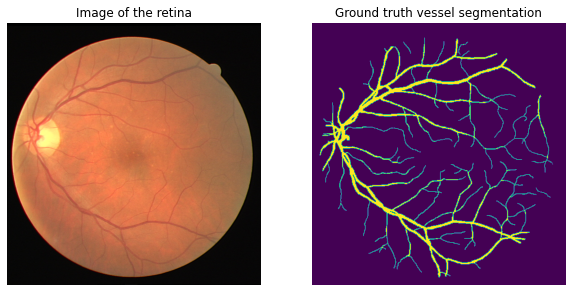

(16, 584, 565, 3)
(16, 584, 565, 1)
(16, 584, 565, 1)
(4, 584, 565, 3)
(4, 584, 565, 1)
(4, 584, 565, 1)


In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from glob import glob

from unet_utils import load_data

# location of the DRIVE dataset
data_folder = 'C:/Users/kbrus/OneDrive - TU Eindhoven/Master Year 2/Q1/Machine Learning/GitHub_ML/8dm50-machine-learning/practicals/data/DRIVE/'
train_paths = glob(data_folder + 'training/images/*.tif')
print(train_paths)
images, masks, segmentations = load_data(train_paths)

# print the shape of image dataset
print(images.shape)

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.title("Image of the retina")
plt.axis('off')
plt.imshow(images[0])

plt.subplot(1, 2, 2)
plt.title("Ground truth vessel segmentation")
plt.axis('off')
plt.imshow(segmentations[0][:, :, 0])

plt.show()

# divide in training and validation
train_images, val_images, train_masks, val_masks, train_segmentations, val_segmentations = train_test_split(
    images, masks, segmentations, test_size=0.2, random_state=7)

# print the shape of the training and valudation datasets
print(train_images.shape)
print(train_masks.shape)
print(train_segmentations.shape)
print(val_images.shape)
print(val_masks.shape)
print(val_segmentations.shape)

### Training a U-Net model

You are already provided with implementation of the U-Net architecture in `unet_model.py`. This is a modular implementation and can be used to generate U-Net architectures with a variety of hyperparameters such as depth and number of feature maps. Before using the model, examine the code and documentation and make sure that you understand all the details.

We will train a U-Net model using smaller patches extracted from the training images. Training the images on smaller patches requires less computation power and results in a more varied training dataset (it has the effect of data augmentation by image translation). Because a U-Net is a fully convolutional network it can be evaluated on inputs of different size (the output size will change according to the input size). Thus, although the model will be trained on smaller patches it can still be used to segment larger images with one pass through the model. 


(3200, 32, 32, 3)


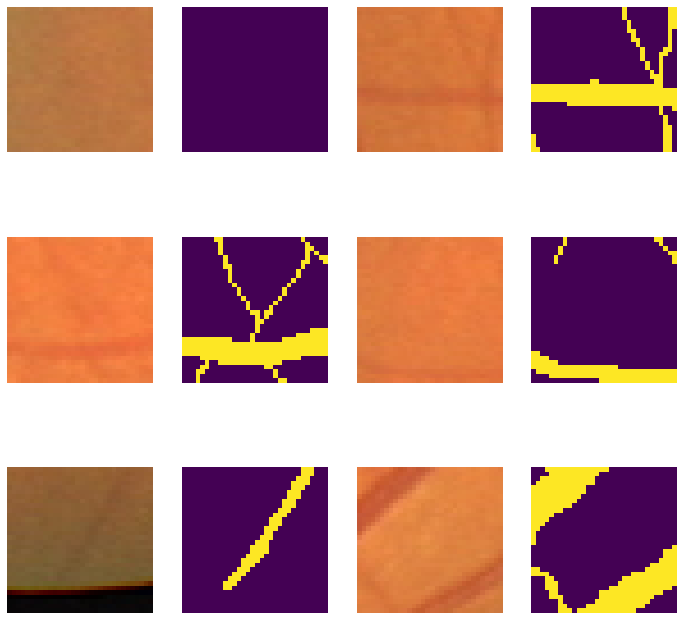

In [6]:
from unet_utils import extract_patches, preprocessing

# work with 32x32 patches
patch_size = (32, 32)

# 200 patches per image
patches_per_im = 200

# visualize a couple of patches as a visual check
patches, patches_segmentations = extract_patches(train_images, train_segmentations, patch_size, patches_per_im, seed=7)

print(patches.shape)

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 12))

for i in range(0, 3):
    axes[i, 0].axis('off')
    axes[i, 0].imshow(patches[i])
    axes[i, 1].axis('off')
    axes[i, 1].imshow(patches_segmentations[i][:, :, 0])
    axes[i, 2].axis('off')
    axes[i, 2].imshow(patches[i+5])
    axes[i, 3].axis('off')
    axes[i, 3].imshow(patches_segmentations[i+5][:, :, 0])

plt.show()

In [7]:
# pad the validation data to fit the U-Net model
# images of shape (584, 565) shape result in concatenation error due to the odd number of columns

print("Old shape:", val_images.shape)

val_images, val_masks, val_segmentations = preprocessing(
    val_images, 
    val_masks, 
    val_segmentations, 
    desired_shape=(584, 584))
    
print("New shape:", val_images.shape)

Old shape: (4, 584, 565, 3)
New shape: (4, 584, 584, 3)


In [8]:
import os
from unet_model import unet
from unet_utils import datagenerator
from keras.models import load_model
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# use a single training image, to better demonstrate the effects of data augmentation
X_train, y_train = np.expand_dims(train_images[0], axis=0), np.expand_dims(train_segmentations[0], axis=0)

print(X_train.shape)
print(y_train.shape)

# hyperparameters
depth = 3
channels = 32
use_batchnorm = True
batch_size = 64
epochs = 1
steps_per_epoch = int(np.ceil((patches_per_im * len(train_images)) / batch_size))

# work with 32x32 patches
patch_size = (32, 32)
# 200 patches per image
patches_per_im = 200

# initialize model
model = unet(input_shape=(None, None, 3), depth=depth, channels=channels, batchnorm=use_batchnorm)

# print a summary of the model
# model.summary(line_length=120)

# compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# stop the training if the validation loss does not increase for 15 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# train the model with the data generator, and save the training history
history = model.fit(datagenerator(X_train, y_train, patch_size, patches_per_im, batch_size),
                              validation_data=(val_images, val_segmentations),
                              steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=2,
                              callbacks=[early_stopping])

(1, 584, 565, 3)
(1, 584, 565, 1)
50/50 - 55s - 1s/step - accuracy: 0.8261 - loss: 0.5234 - val_accuracy: 0.9211 - val_loss: 0.4219


### Visualizing the segmentation results

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


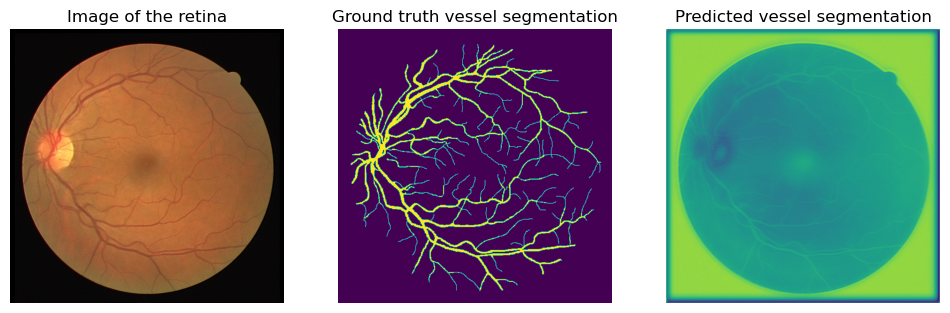

In [9]:
# run the model on one test image and show the results
from unet_utils import preprocessing

# test data paths
impaths_test = glob(data_folder + 'test/images/*.tif')

# load data
test_images, test_masks, test_segmentations = load_data(impaths_test, test=True)

# pad the data to fit the U-Net model
test_images, test_masks, test_segmentations = preprocessing(test_images, test_masks, test_segmentations, 
                                                            desired_shape=(584, 584))

# use a single image to evaluate
X_test, y_test = np.expand_dims(test_images[0], axis=0), np.expand_dims(test_masks[0], axis=0)

# predict test samples
test_prediction = model.predict(X_test, batch_size=4)

# visualize the test result
plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.title("Image of the retina")
plt.axis('off')
plt.imshow(test_images[0])

plt.subplot(1, 3, 2)
plt.title("Ground truth vessel segmentation")
plt.axis('off')
plt.imshow(test_segmentations[0][:, :, 0])

plt.subplot(1, 3, 3)
plt.title("Predicted vessel segmentation")
plt.axis('off')
plt.imshow(test_prediction[0, :, :, 0])

plt.show()

# Exercises

## Number of parameters

The first convolutional layer in the MNIST example has 320 parameters. The first fully connected layer has 1179,776 parameters. What do these parameters correspond to? 

<font color='#770a0a'>What is the general expression for the number of parameters of 1) a convolutional layer and 2) a fully-connected layer?</font>

In general, the parameters in a layer are weights that are 'learned' during the training of the model. The standard formula is: ((shape of width of the filter * shape of height of the filter * number of filters in the previous layer+1) * number of filters). The 1 represents the bias term for every filter. Fully connected layers have in general the highest number of paramaters when it comes to other types of layers. The formula for the amount of parameters is: ((current layer neurons c * previous layer neurons p)+1*c). 

Source: https://towardsdatascience.com/understanding-and-calculating-the-number-of-parameters-in-convolution-neural-networks-cnns-fc88790d530d (did the calculations, they are correct)


## Fully-convolutional MNIST model

Modify the model in the MNIST example in such a way that it only contains convolutional layers while keeping the same number of parameters. If you do the modification correctly, the two models will have the same behaviour (i.e. they will represent the same model, only with different implementation). Show this experimentally. 



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Scale the image intensities to the 0-1 range
x_train = (x_train / 255.0).astype(np.float32)
x_test = (x_test / 255.0).astype(np.float32)

# Convert the data to channel-last format (28, 28, 1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Convert the labels to one-hot encoded format
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define the original model
original_model = Sequential()
original_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
original_model.add(Conv2D(64, (3, 3), activation='relu'))
original_model.add(MaxPooling2D(pool_size=(2, 2)))
original_model.add(Dropout(0.25))

original_model.add(Flatten())
original_model.add(Dense(128, activation='relu'))
original_model.add(Dropout(0.5))
original_model.add(Dense(10, activation='softmax'))

# Print the summary of the original model
original_model.summary()

# Define the fully convolutional model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Replace Flatten and Dense layers with Conv2D layers
model.add(Conv2D(128, (12, 12), activation='relu'))  # This layer replaces Flatten and first Dense layer
model.add(Dropout(0.5))
model.add(Conv2D(10, (1,1), activation='softmax'))  # This layer replaces the second Dense layer
model.add(Flatten())

# Print the summary of the fully convolutional model
model.summary()

# Compile the original model
original_model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

# Compile the fully convolutional model
model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

# Train the original model
original_model.fit(x_train, y_train,
                   batch_size=128,
                   epochs=1,
                   verbose=1,
                   validation_data=(x_test, y_test))

# Train the fully convolutional model
model.fit(x_train, y_train,
          batch_size=128,
          epochs=1,
          verbose=1,
          validation_data=(x_test, y_test))

# Evaluate the original model
original_score = original_model.evaluate(x_test, y_test, verbose=0)
print('Original model - Test loss:', original_score[0])
print('Original model - Test accuracy:', original_score[1])

# Evaluate the fully convolutional model
score = model.evaluate(x_test, y_test, verbose=0)
print('Fully convolutional model - Test loss:', score[0])
print('Fully convolutional model - Test accuracy:', score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        


## U-Net architecture

<font color='#770a0a'> What is the role of the skip connections in the U-Net neural network architecture? Will it be possible to train the exact same architecture with the skip connections omitted? If yes, what would be the expected result? If no, what would be the cause of the error?</font>

The role of skip connections in the U-net neural network architecture is to be able to upsample the images again:

During the <b>encoder path</b>, the input images are essentially downsampled. Useful features are extracted with convolutional layers. The images are then downsampled through average or max pooling, resulting in a loss of spatial information but allows the convolutional layers to extract more "important" features.

During the <b>decoder path</b> this spatial information is regained through a process called <b>upsampling</b>, which is also where the skip connections come into play. <b>Skip connections</b> are connections between the decoding and encoder path of the network. Versions of the original input image are fed back to the upsampling layers (for instance transpose convolutions or other interpolation methods) and are basically concatenated in such a way that the image mask is updated into a higher resolution.

Without the use skip connections, there is not enough information to upsample the images properly as a result the resulting segmentation task loses detail. In short, yes it is possible to make a U-nect architecture without skip connections however some of the finer details in the final segmentation is lost, and will therefore be much less accurate.



## Data augmentation

<font color='#770a0a'>Why does data augmentation result in less overfitting? Can data augmentation be applied to the test samples? If yes, towards what goal? If no, what is preventing that?</font>


Implement random brightness augmentation of the image data by adding a random offset to the image intensity before passing them trough the network at training time. Train a model with random brightness augmentation and compare it to the baseline above. 

Implement data augmentation procedure that in addition to brightness augmentation also performs b-spline geometric augmentation using the [`gryds`](https://github.com/tueimage/gryds) package (you can look at the documentation of the package for an example on how to do that). Compare the new model with the baseline and the model that only performs brightness augmentation.



## Answers data augmentation 
#### Why does data augmentation result in less overfitting? 
Overfitting occurs when the model learns the patterns of the training dataset too well, including irrelevant details and noise. This makes it harder for the model to generalize to new unseen data, reducing its performance on other datasets. Data augmentation generates new variations of the existing training dataset, creating more data to learn from. The model is then trained on a greater variety of inputs to avoid learning the specific patterns of the training dataset and overfitting all the samples. Instead, the model is forced to generalize. 

#### Can data augmentation be applied to the test samples? If yes, towards what goal? If no, what is preventing that?
Data augmentation is mainly used to artificially increase the volume of available data and to increase the variety of data. The increase in data during training will utlimately help in boosting the model performance, while the increase in data variety helps in generalizing the model better. Data augmentation is primarily used on the training dataset for the previously mentioned reasons. Regardless data augmentation could technically also be used on the test set. However, in most cases this should NOT be done. Mainly because the test set represents the real life data, it is the datset on which you test your performance and robustness. Altering your test set in any way might create a bias (especially when you use the same augmentations as on your training data) in your model results and should therefore generally be avoided, even in cases where you have a very small test set.

Due tot he previously mentioned reasons, it was surprising that we ended up with worse models (link naar accuracu). One of the reasons might be that the augmentations resulted in 'unrealistic' data. After visual inspection, we deemed the alterations realistic, hwoever it could be that the change in brightness or the change in geometry resulted in unrealisitc images, which in turn could result in a worse model

#### Results:
From the results below we can see a slightly improved validation accuracy for both types of augmentation (0.914 and 0.921) compared to the basline model (0.912). The accuracy of the training set on the other hand is slighty worse for the augemntation methods than the baseline model. This is good because it means the models that use the augmentations methods are less overfitted and generalize better to new data.

We can also see that the brightness augmentation model performs better than the b-spline augmentation model. This is unexpected since the b-spline augmentation model also includes the brightness augmentation data. Meaning that it has an even more diverse set to train on. The reason for the lower b-spline augmentation accuracy is unclear but a hypothesis is that the brightness augmentation is a more realistic augmentation than b-spline. Meaning that the model learns more meaningfull parameters from the different brightness patches than from the distorted b-spline patches

In [12]:
import os
from unet_model import unet
from unet_utils import datagenerator
from keras.models import load_model
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import gryds
from week_4 import *


# pad the validation data to fit the U-Net model
val_images, val_masks, val_segmentations = preprocessing(
    val_images, 
    val_masks, 
    val_segmentations, 
    desired_shape=(584, 584))

# work with 32x32 patches
patch_size = (32, 32)

# 200 patches per image
patches_per_im = 200

# hyperparameters
depth = 3
channels = 32
use_batchnorm = True
batch_size = 64
epochs = 150
steps_per_epoch = int(np.ceil((patches_per_im * len(train_images)) / batch_size))

# stop the training if the validation loss does not increase for 15 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)


######################### Baseline model
print('baseline model:')
# initialize model
model_baseline = unet(input_shape=(None, None, 3), depth=depth, channels=channels, batchnorm=use_batchnorm)

# compile the model
model_baseline.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# train the model with the data generator, and save the training history
history_baseline = model_baseline.fit(datagenerator1(train_images, train_segmentations, patch_size, patches_per_im, batch_size, brightness_augmentation= False, bspline_augmentation= False),
                              validation_data=(val_images, val_segmentations),
                              steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=2,
                              callbacks=[early_stopping])

######################### Model with brightness augmentation
print('brightness augmentation:')
# initialize model
model_brightness = unet(input_shape=(None, None, 3), depth=depth, channels=channels, batchnorm=use_batchnorm)

# compile the model
model_brightness.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# train the model with the data generator, and save the training history
history_brightness = model_brightness.fit(datagenerator1(train_images, train_segmentations, patch_size, patches_per_im, batch_size, brightness_augmentation= True, bspline_augmentation= False),
                              validation_data=(val_images, val_segmentations),
                              steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=2,
                              callbacks=[early_stopping])

######################### Model with brightness and  b-spline geometric augmentation
print('b-spline geometric augmentation:')
# initialize model
model_bspline = unet(input_shape=(None, None, 3), depth=depth, channels=channels, batchnorm=use_batchnorm)

# compile the model
model_bspline.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# train the model with the data generator, and save the training history
history_bspline = model_bspline.fit(datagenerator1(train_images, train_segmentations, patch_size, patches_per_im, batch_size, brightness_augmentation= True, bspline_augmentation= True),
                              validation_data=(val_images, val_segmentations),
                              steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=2,
                              callbacks=[early_stopping])

baseline model:
50/50 - 31s - 617ms/step - accuracy: 0.7525 - loss: 0.5799 - val_accuracy: 0.9116 - val_loss: 0.5746
brightness augmentation:
50/50 - 29s - 585ms/step - accuracy: 0.6942 - loss: 0.6285 - val_accuracy: 0.9211 - val_loss: 0.5342
b-spline geometric augmentation:
50/50 - 36s - 723ms/step - accuracy: 0.7184 - loss: 0.6050 - val_accuracy: 0.9143 - val_loss: 0.5907
